In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import copy
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import zscore

In [2]:
df21 = pd.read_excel("apr_2021.xlsx")
df20 = pd.read_excel("apr_2020.xlsx")
df19 = pd.read_excel("apr_2019.xlsx")
df18 = pd.read_excel("apr_2018.xlsx")
df17 = pd.read_excel("apr_2017.xlsx")

In [3]:
print(df21.shape)
print(df20.shape)
print(df19.shape)
print(df18.shape)
print(df17.shape)

(2515, 54)
(2566, 54)
(2531, 54)
(2054, 54)
(1734, 54)


In [4]:
df21.head(3)

,SNO,EMP.NO,Employee name,Designation,Personnel Area,Personnel Sub Area,Bank Name,Bank A/c. No.,Calendar Days,Paid days,...,Prof. Tax,Income Tax,Subsidised Lunch,CUG Recovery,Other Deductions,Salary Advance,Cf Pf monthly,Ptax Ded.CF,Total.ded,Net Pay
0,1.0,1002.0,Sai Sarma K L N S,General Manager,AMR Power Private Limited,CorporateOffice,State Bank Of India,1.009219e+10,30.0,30.0,...,200,38335,0,0,0,0,0,0,52388,159235.0
1,2.0,1047.0,Seshagiri Rao N,Vice President,AMR Power Private Limited,CorporateOffice,State Bank Of India,2.001699e+10,30.0,30.0,...,200,79223,0,0,0,0,0,0,100682,234471.0
2,3.0,2210.0,Premnadh Tedla,Deputy General Manager,AMR Power Private Limited,CorporateOffice,State Bank Of India,2.001692e+10,30.0,30.0,...,200,38417,0,0,0,0,0,0,52343,166620.0


In [5]:
df21.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SNO,2514.0,1.257500e+03,7.258736e+02,1.000000e+00,6.292500e+02,1.257500e+03,1.885750e+03,2.514000e+03
EMP.NO,2514.0,1.333591e+04,1.125554e+04,1.001000e+03,4.207250e+03,9.213000e+03,2.081175e+04,4.400100e+04
Bank A/c. No.,2355.0,2.291999e+11,3.048194e+12,3.527934e+09,2.014992e+10,3.049031e+10,3.302907e+10,4.889950e+13
Calendar Days,2514.0,3.000000e+01,0.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
Paid days,2514.0,2.987510e+01,1.208437e+00,1.100000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
Basic,2515.0,5.558109e+04,1.393598e+06,1.786030e+03,1.003250e+04,1.655147e+04,2.958400e+04,6.989322e+07
Basic Arrears,2515.0,3.017156e+01,1.044919e+03,-9.677930e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.794074e+04
HRA,2515.0,2.125440e+04,5.329520e+05,0.000000e+00,3.560000e+03,6.435000e+03,1.184000e+04,2.672741e+07
HRA Arrears,2515.0,1.248468e+01,4.255042e+02,-3.871230e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.569949e+04
Conv.Alw,2515.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [6]:
simp_df21 = df21[['EMP.NO','Employee name','Designation','DOJ','Basic','Spl.Alw','Total Gross']]
simp_df20 = df20[['EMP.NO','Employee name','Designation','DOJ','Basic','Spl.Alw','Total Gross']]
simp_df19 = df19[['EMP.NO','Employee name','Designation','DOJ','Basic','Spl.Alw','Total Gross']]
simp_df18 = df18[['EMP.NO','Employee name','Designation','DOJ','Basic','Spl.Alw','Total Gross']]
simp_df17 = df17[['EMP.NO','Employee name','Designation','DOJ','Basic','Spl.Alw','Total Gross']]

In [7]:
df_21 = simp_df21.rename(columns = {'Total Gross': 'T.Gross21'}, inplace = False)
df_20 = simp_df20.rename(columns = {'Total Gross': 'T.Gross20'}, inplace = False)
df_19 = simp_df19.rename(columns = {'Total Gross': 'T.Gross19'}, inplace = False)
df_18 = simp_df18.rename(columns = {'Total Gross': 'T.Gross18'}, inplace = False)
df_17 = simp_df17.rename(columns = {'Total Gross': 'T.Gross17'}, inplace = False)

In [8]:
df_main = pd.merge(df_21, df_20[["EMP.NO","T.Gross20"]], on="EMP.NO", how="left")
df_main = pd.merge(df_main, df_19[["EMP.NO","T.Gross19"]], on="EMP.NO", how="left")
df_main = pd.merge(df_main, df_18[["EMP.NO","T.Gross18"]], on="EMP.NO", how="left")
df_main = pd.merge(df_main, df_17[["EMP.NO","T.Gross17"]], on="EMP.NO", how="left")
df_main

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17
0,1002.0,Sai Sarma K L N S,General Manager,04.08.2006,115441.00,50006.00,2.116230e+05,1.871890e+05,1.871890e+05,1.686780e+05,150608.01
1,1047.0,Seshagiri Rao N,Vice President,13.12.2010,177158.00,87132.00,3.351530e+05,2.648310e+05,2.648310e+05,1.999180e+05,162619.01
2,2210.0,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.00,33827.00,2.189630e+05,2.033850e+05,2.033850e+05,1.639610e+05,174362.01
3,2402.0,Shivadas,Associate,25.12.2008,11865.00,4327.00,2.192600e+04,1.877800e+04,1.930600e+04,1.740600e+04,16864.00
4,2403.0,Prashanth Poojary,Manager,01.01.2009,16821.00,6673.00,3.162300e+04,3.040700e+04,3.040700e+04,2.767700e+04,26814.00
...,...,...,...,...,...,...,...,...,...,...,...
2510,21116.0,T. Surendra Narayana,Manager,28.08.2017,39831.00,20209.00,7.929000e+04,7.470000e+04,7.470000e+04,6.613500e+04,NaN
2511,21159.0,K. Shanmuka Rao,Deputy Manager,11.10.2017,29167.00,13269.00,5.653300e+04,4.820000e+04,4.820000e+04,4.611700e+04,NaN
2512,21345.0,Sridhatri Bandaru,Assistant Manager,31.07.2020,33334.00,15422.00,6.486700e+04,NaN,NaN,NaN,NaN
2513,36702.0,Akansha Sisodiya,Officer,20.05.2020,11000.00,5684.00,2.200000e+04,NaN,NaN,NaN,NaN


In [9]:
df_main.head(10)

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17
0,1002.0,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01
1,1047.0,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01
2,2210.0,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01
3,2402.0,Shivadas,Associate,25.12.2008,11865.0,4327.0,21926.00,18778.00,19306.00,17406.0,16864.00
4,2403.0,Prashanth Poojary,Manager,01.01.2009,16821.0,6673.0,31623.00,30407.00,30407.00,27677.0,26814.00
5,2405.0,M Kiran Kumar,Officer,02.01.2009,17550.0,6960.0,32992.00,31421.00,31421.00,28330.0,27447.00
6,2406.0,M Rajendra Kumar,Manager,28.01.2009,23427.0,9293.0,44042.00,40779.00,40779.00,36765.0,35620.00
7,2407.0,K Govindaraj,Officer,28.01.2009,23965.0,9506.0,45053.00,39870.00,39870.00,35946.0,34827.00
8,2408.0,V Bharathi Raja,Officer,28.01.2009,18656.0,7401.0,35073.00,31885.00,31885.00,28747.0,27852.00
9,2409.0,K.Ramesh,Senior Manager,02.03.2009,39601.0,15708.0,74448.00,67680.00,67680.00,59890.0,49546.00


In [10]:
df_main.isna().sum()

EMP.NO              1
Employee name       1
Designation         1
DOJ                 1
Basic               0
Spl.Alw             0
T.Gross21           0
T.Gross20         151
T.Gross19         329
T.Gross18         837
T.Gross17        1279
dtype: int64

In [11]:
df_main = df_main.drop(labels = 2514, axis = 0)

In [12]:
df = df_main.replace(np.nan, 0)
df.head(30)

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17
0,1002.0,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.00,150608.01
1,1047.0,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.00,162619.01
2,2210.0,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.00,174362.01
3,2402.0,Shivadas,Associate,25.12.2008,11865.0,4327.0,21926.00,18778.00,19306.00,17406.00,16864.00
4,2403.0,Prashanth Poojary,Manager,01.01.2009,16821.0,6673.0,31623.00,30407.00,30407.00,27677.00,26814.00
5,2405.0,M Kiran Kumar,Officer,02.01.2009,17550.0,6960.0,32992.00,31421.00,31421.00,28330.00,27447.00
6,2406.0,M Rajendra Kumar,Manager,28.01.2009,23427.0,9293.0,44042.00,40779.00,40779.00,36765.00,35620.00
7,2407.0,K Govindaraj,Officer,28.01.2009,23965.0,9506.0,45053.00,39870.00,39870.00,35946.00,34827.00
8,2408.0,V Bharathi Raja,Officer,28.01.2009,18656.0,7401.0,35073.00,31885.00,31885.00,28747.00,27852.00
9,2409.0,K.Ramesh,Senior Manager,02.03.2009,39601.0,15708.0,74448.00,67680.00,67680.00,59890.00,49546.00


In [13]:
df.isna().sum()

EMP.NO           0
Employee name    0
Designation      0
DOJ              0
Basic            0
Spl.Alw          0
T.Gross21        0
T.Gross20        0
T.Gross19        0
T.Gross18        0
T.Gross17        0
dtype: int64

In [14]:
df.to_excel("wo_designationfilter.xlsx")

In [15]:
result_df = df[(df["Designation"]=="Assistant General Manager") | (df["Designation"]=="Deputy General Manager") | (df["Designation"]=="General Manager") | (df["Designation"]=="Senior General Manager") | (df["Designation"]=="Associate Vice President") | (df["Designation"]=="Senior Vice President") | (df["Designation"]=="Vice President")]
result_df

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17
0,1002.0,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01
1,1047.0,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01
2,2210.0,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01
17,2426.0,T.M.Devaiah,General Manager,01.12.2009,88370.0,57390.0,181108.01,164643.01,164643.01,149675.0,136068.01
21,2435.0,Gurudas Mesta,Assistant General Manager,16.12.2010,89328.0,42877.0,167936.01,158430.01,158430.01,140204.0,127458.01
...,...,...,...,...,...,...,...,...,...,...,...
2484,21302.0,Man Bahadur,Assistant General Manager,08.08.2018,68297.0,39177.0,134793.00,124675.00,118886.00,0.0,0.00
2487,37202.0,Mandapati Thirumala Raju,Associate Vice President,09.01.2019,141250.0,67800.0,265550.00,282500.00,282500.00,0.0,0.00
2489,1006.0,Srinivasa Rao Peddeti,Deputy General Manager,02.04.2007,62375.0,31808.0,119133.01,91641.01,91641.01,79688.0,69908.01
2495,4449.0,P.V.N.Suryanarayana Rao,Assistant General Manager,05.10.2007,70834.0,28099.0,133167.00,87733.00,87733.00,74862.0,62125.00


In [16]:
result_df.to_excel("with_DesignationFilter.xlsx")

array([[<AxesSubplot:title={'center':'EMP.NO'}>,
        <AxesSubplot:title={'center':'Basic'}>,
        <AxesSubplot:title={'center':'Spl.Alw'}>],
       [<AxesSubplot:title={'center':'T.Gross21'}>,
        <AxesSubplot:title={'center':'T.Gross20'}>,
        <AxesSubplot:title={'center':'T.Gross19'}>],
       [<AxesSubplot:title={'center':'T.Gross18'}>,
        <AxesSubplot:title={'center':'T.Gross17'}>, <AxesSubplot:>]],
      dtype=object)

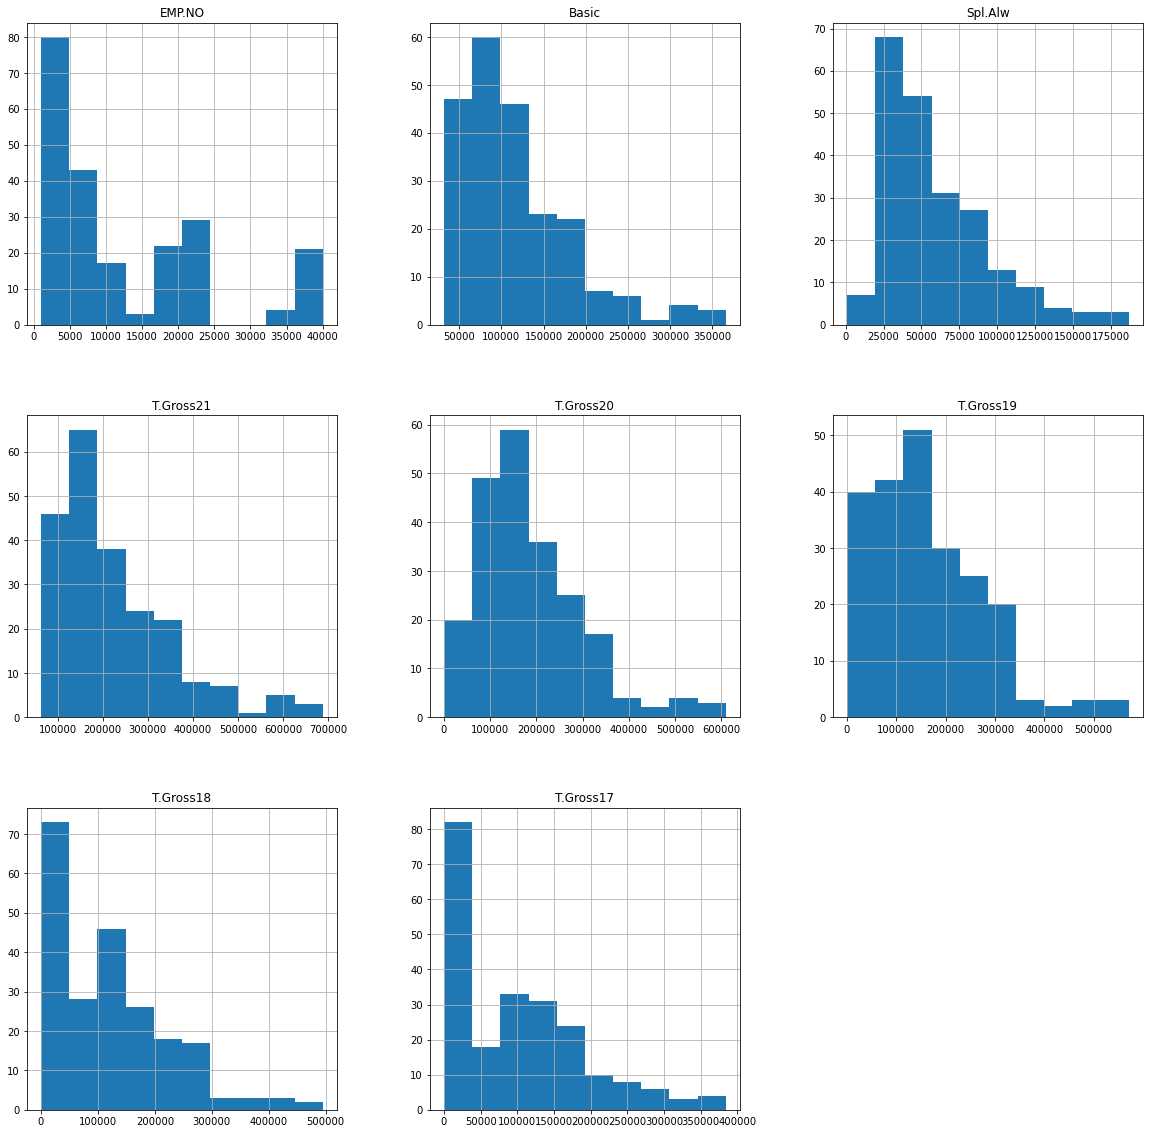

In [17]:
result_df.hist(figsize=(20, 20))

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: P

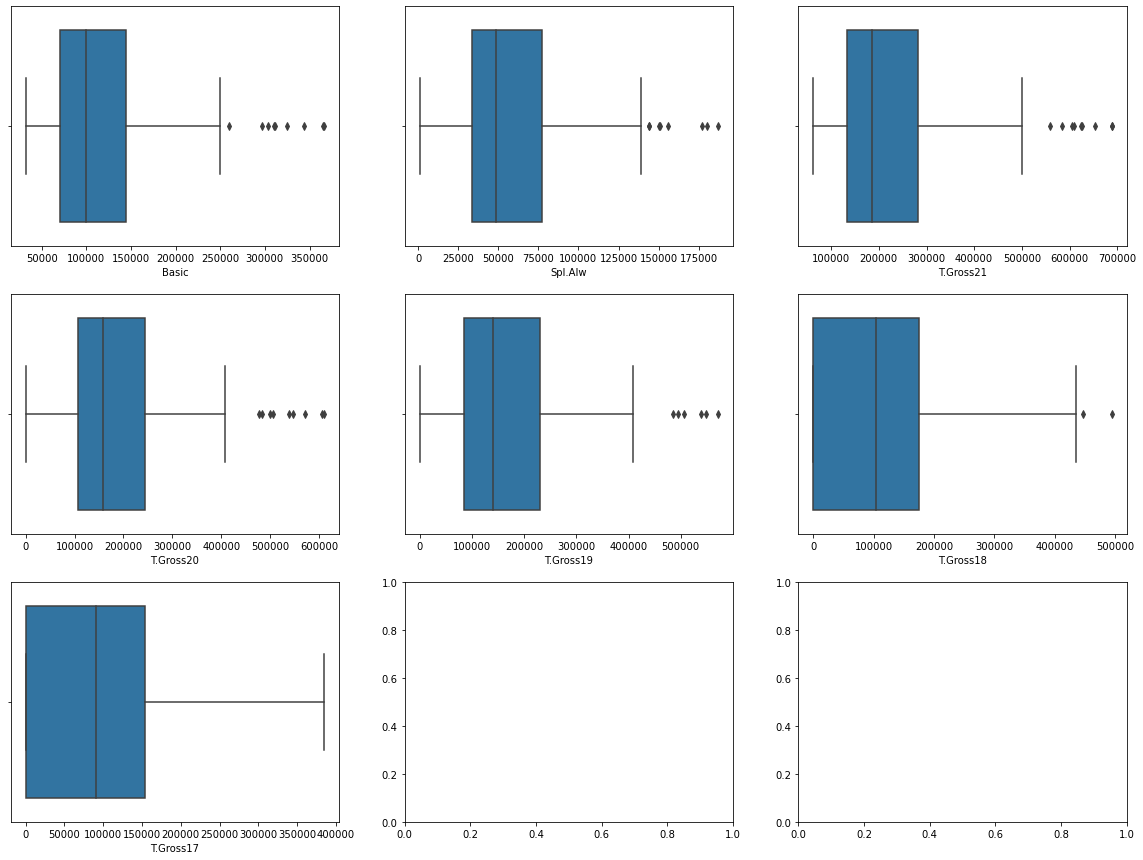

In [18]:
f,axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(result_df['Basic'],ax=axes[0,0])
sns.boxplot(result_df['Spl.Alw'],ax=axes[0,1])
sns.boxplot(result_df['T.Gross21'],ax=axes[0,2])
sns.boxplot(result_df['T.Gross20'],ax=axes[1,0])
sns.boxplot(result_df['T.Gross19'],ax=axes[1,1])
sns.boxplot(result_df['T.Gross18'],ax=axes[1,2])
sns.boxplot(result_df['T.Gross17'],ax=axes[2,0])
plt.show()